In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.stats.multicomp as multi

In [2]:
col_map = {'AGE':'age','S1Q10A':'income','S1Q1D2':'asian',
           'S1Q10A':'income','S1Q6A':'edu','S1Q1D3':'black',
           'S1Q1D5':'white','S1Q1C':'hispanich'}

col_names = [x for x in col_map.keys()]

In [3]:
#read data
data = pd.read_csv('/home/data-sci/Desktop/analysis/course/nesarc_pds.csv',usecols=col_names)

In [4]:
#renaming the cols 
data.rename(columns=col_map,inplace=True)
data.head()

,age,hispanich,asian,black,white,edu,income
0,23,1,2,2,1,8,17500
1,28,1,2,2,1,8,11000
2,81,1,2,2,1,6,6000
3,18,1,2,2,1,8,27000
4,36,2,2,1,2,12,42000


In [5]:
# reducing ethnicity to one column 
def ethnicity(row):
    if row['asian'] == 1:
        return 'asian'
    if row['white'] == 1:
        return 'white'
    if row['black'] == 1:
        return 'black'
    if row['hispanich'] == 1:
        return 'hispanich'

data['ethnicity'] = data.apply(lambda row: ethnicity(row), axis=1)
data.drop(labels=['hispanich','asian','black','white'],inplace=True,axis=1)
data.head()

,age,edu,income,ethnicity
0,23,8,17500,white
1,28,8,11000,white
2,81,6,6000,white
3,18,8,27000,white
4,36,12,42000,black


In [7]:
data.shape

(43093, 4)

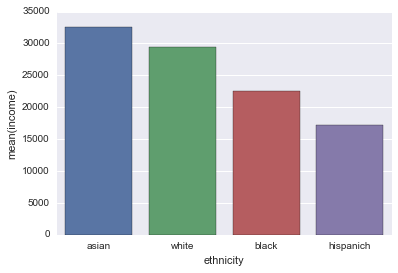

In [6]:
%matplotlib inline
sub = data.groupby(['ethnicity'])
sub = sub[['ethnicity','income']].mean()
sub.reset_index(inplace=True)
seaborn.barplot(x=sub['ethnicity'],y=sub['income'],order=['asian','white','black','hispanich'],orient='v')

In [105]:
sub2 = data[['ethnicity','income']].copy()
sub2.dropna(inplace=True)

In [106]:
model = multi.MultiComparison(sub2['income'], sub2['ethnicity']).tukeyhsd()
print(model.summary())

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
  group1    group2    meandiff     lower      upper    reject
-------------------------------------------------------------
  asian     black   -10045.4661 -13211.1645 -6879.7677  True 
  asian   hispanich -15364.1665 -21982.7877 -8745.5453  True 
  asian     white    -3109.9766  -6109.7162 -110.2371   True 
  black   hispanich  -5318.7004 -11363.3079  725.9071  False 
  black     white    6935.4895   5620.3579  8250.6211   True 
hispanich   white    12254.1899  6294.8215  18213.5582  True 
-------------------------------------------------------------
